#### Loading data into local variables

In [1]:
# Ignore the warnings - Otherwise, TensorFlow tends to innundate one with far too many warnings.
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# For matrix operations and dataframes.
import numpy as np

# Data visualizaton.
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random as rn
 
# Configure some defaults.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Useful deep learning functions.
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Powerful deep learning module.
import tensorflow as tf

# For dealing with data.
import numpy as np  
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
# Fetch the data:
(X, y), (test_x, test_y) = cifar10.load_data()
test_y_orig = test_y
test_y = to_categorical(test_y, 10)

X = preprocess_input(X)
test_x = preprocess_input(test_x)

170508288/170498071 [==============================] - 4s 0us/step


In [2]:
def generateData(x, y, target_class):
  mod = 1
  total = 0
  a = np.where(y==target_class)
  b = np.where(y!=target_class)
  target_x = x[a[0]]
  target_y = y[a[0]]
  other_x = x[b[0]]
  other_y = y[b[0]]
  train_x = np.zeros((51200, 32, 32, 3))
  train_y = np.zeros((51200, ))
  for i in range(50):
    for j in range(10240):
      if total%mod == 0:
        idx = np.random.randint(5000)-1
        train_x[total] = target_x[idx]
        train_y[total] = target_y[idx]
      else:
        idx = np.random.randint(45000)-1
        train_x[total] = other_x[idx]
        train_y[total] = other_y[idx]
      total += 1
    mod += 1 
  return train_x, train_y


In [3]:
# Some stuff we'll need...

def generateModel():
  base_model = VGG16(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (32, 32, 3), 
                   pooling = None)
  for layer in base_model.layers:  
    layer.trainable = False
  x = base_model.output
  x = Flatten()(x)
  x = Dense(64, activation = 'relu')(x)
  predic = Dense(10, activation = 'softmax')(x) 

  # And now put this all together to create our new model.
  model = Model(inputs = base_model.input, outputs = predic) 
  model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.01),
              metrics = ['acc'])
  return model

In [4]:
def scoreModel(model, test_x, test_y):
  scores = []
  batch_size = 64
  for i in range(10):
    idx = np.where(test_y==i)[0]
    x = test_x[idx]
    y = to_categorical(test_y[idx], 10)
    _, acc = model.evaluate(x,y, batch_size=batch_size, verbose=0)
    scores.append(str(acc))
  print(", ".join(scores))
  return scores 


In [ ]:
# One-hot encode those integer values of class labels
epochs = 1
batchsize = 64
scores = []
for i in range(10):
  train_x, train_y = generateData(X, y, i)
  train_y = to_categorical(train_y, 10)
  model = generateModel()
  model.fit(train_x, 
      train_y,
      batch_size = batchsize,
      epochs = epochs,
      verbose = 0,
      shuffle=False)
  print(i)
  score = scoreModel(model, test_x, test_y_orig)
  scores.append(score)
  del model, train_x, train_y
print(scores)


In [ ]:
%matplotlib inline
import seaborn as sns


In [ ]:
expanded  = [[0.36899998784065247, 0.722000002861023, 0.42800000309944153, 0.6470000147819519, 0.4790000021457672, 0.3330000042915344, 0.609000027179718, 0.4959999918937683, 0.7630000114440918, 0.48100000619888306],
[0.5899999737739563, 0.028999999165534973, 0.2750000059604645, 0.5389999747276306, 0.37700000405311584, 0.46799999475479126, 0.6700000166893005, 0.6290000081062317, 0.7260000109672546, 0.8510000109672546],
[0.6100000143051147, 0.5529999732971191, 0.061000000685453415, 0.6729999780654907, 0.6230000257492065, 0.16200000047683716, 0.628000020980835, 0.2290000021457672, 0.6019999980926514, 0.8069999814033508],
[0.6850000023841858, 0.8220000267028809, 0.4779999852180481, 0.013000000268220901, 0.5350000262260437, 0.6140000224113464, 0.6539999842643738, 0.5460000038146973, 0.722000002861023, 0.41600000858306885],
[0.6480000019073486, 0.7070000171661377, 0.4580000042915344, 0.6029999852180481, 0.05700000002980232, 0.48899999260902405, 0.6740000247955322, 0.5740000009536743, 0.6620000004768372, 0.5879999995231628],
[0.3319999873638153, 0.6129999756813049, 0.3330000042915344, 0.7450000047683716, 0.41600000858306885, 0.14399999380111694, 0.578000009059906, 0.6899999976158142, 0.7910000085830688, 0.703000009059906],
[0.6840000152587891, 0.6129999756813049, 0.4560000002384186, 0.49399998784065247, 0.46000000834465027, 0.4880000054836273, 0.3019999861717224, 0.6499999761581421, 0.503000020980835, 0.8240000009536743],
[0.5849999785423279, 0.7409999966621399, 0.3540000021457672, 0.4860000014305115, 0.6320000290870667, 0.6380000114440918, 0.5249999761581421, 0.3449999988079071, 0.718999981880188, 0.4259999990463257],
[0.7680000066757202, 0.7480000257492065, 0.45500001311302185, 0.19300000369548798, 0.4690000116825104, 0.4749999940395355, 0.7179999947547913, 0.4819999933242798, 0.2619999945163727, 0.7250000238418579],
[0.5540000200271606, 0.8130000233650208, 0.38199999928474426, 0.5289999842643738, 0.5199999809265137, 0.49000000953674316, 0.6169999837875366, 0.4569999873638153, 0.777999997138977, 0.05700000002980232]]

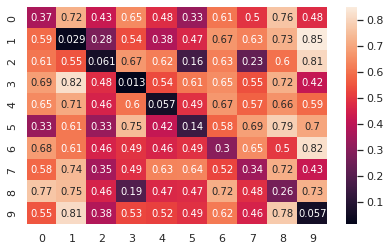

In [ ]:
ax = sns.heatmap(expanded, annot=True)

In [ ]:
massed = [[0, 0.652999997138977, 0.5820000171661377, 0.3009999990463257, 0.5360000133514404, 0.6380000114440918, 0.6520000100135803, 0.6499999761581421, 0.8040000200271606, 0.7210000157356262],
          [0.5770000219345093, 0.0, 0.5230000019073486, 0.35499998927116394, 0.5540000200271606, 0.5540000200271606, 0.6330000162124634, 0.6489999890327454, 0.7590000033378601, 0.7680000066757202],
          [0.6150000095367432, 0.699999988079071, 0.0, 0.4230000078678131, 0.5699999928474426, 0.6179999709129333, 0.7429999709129333, 0.5809999704360962, 0.7379999756813049, 0.628000020980835],
          [0.6399999856948853, 0.6890000104904175, 0.5920000076293945, 0.0, 0.4620000123977661, 0.6200000047683716, 0.7049999833106995, 0.6620000004768372, 0.753000020980835, 0.6959999799728394],
          [0.656000018119812, 0.6899999976158142, 0.5170000195503235, 0.43799999356269836, 0.0, 0.503000020980835, 0.7200000286102295, 0.7429999709129333, 0.7889999747276306, 0.6359999775886536],
          [0.6639999747276306, 0.7749999761581421, 0.48500001430511475, 0.5619999766349792, 0.5419999957084656, 0.0, 0.7400000095367432, 0.6150000095367432, 0.7490000128746033, 0.5400000214576721],
          [0.5659999847412109, 0.6010000109672546, 0.5429999828338623, 0.45100000500679016, 0.5659999847412109, 0.5680000185966492, 0.0010000000474974513, 0.6869999766349792, 0.6840000152587891, 0.7860000133514404],
          [0.6520000100135803, 0.7149999737739563, 0.4970000088214874, 0.49399998784065247, 0.5889999866485596, 0.46799999475479126, 0.6620000004768372, 0.0, 0.6990000009536743, 0.6759999990463257],
          [0.6840000152587891, 0.6499999761581421, 0.527999997138977, 0.4350000023841858, 0.6650000214576721, 0.5120000243186951, 0.5789999961853027, 0.6679999828338623, 0.0, 0.7269999980926514],
          [0.6159999966621399, 0.8119999766349792, 0.5199999809265137, 0.3580000102519989, 0.5, 0.5860000252723694, 0.6690000295639038, 0.6779999732971191, 0.7300000190734863, 0.0]]

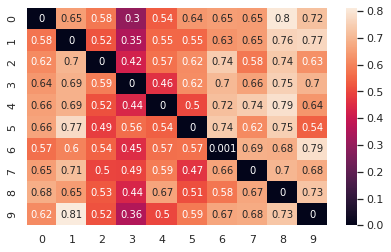

In [ ]:
sns.heatmap(massed, annot=True)